<a href="https://colab.research.google.com/github/harithaanduri/ML-projects/blob/main/Fraudprctce_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 This case requires i need to develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having 6362620 rows and 10 columns.

AIM: Considering certain factors we need to classify whether or not a customer transaction is fraud or not.

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install --upgrade scikit-learn==1.0.2
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the Dataset Fraud by using pandas.

In [ ]:
frd = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fraud (1).csv")

#  Exploratory Data Analysis

Although there are many definations for EDA,we want you to understand the objective of performing EDA.

Through EDA we get answers for a few questions before getting started with the data cleaning and building statistical models.

The questions we need to answers through EDA could be,

1.What are the basic traits of the dataset we are going to work on? ex: it's shape, datatypes, description, uniqueness, size, missing values.

2.Is the data sufficient? the reason for this question is some algorithms need good amount of data to produce efficient results?

3.do the Independent variables have any relationship between them? ex: multicolinearlity, how strong are they related to target variable?

4.What can we deduce from each of the variables(through visuals)?

5.What can we deduce from the relationship between each of the variables(multivariate analysis)?

6.lastly, the type and complexity of the dataset.



In [ ]:
frd.head(5) #checking how the data is

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
frd.tail(5) # checking how the data is

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
frd.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
fraud = frd.copy()  #creating a copy of data

The info() method prints information about the DataFrame.

The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [ ]:
fraud.info()  #get all information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
fraud.shape

(6362620, 11)

The describe() method returns description of the data in the DataFrame.

If the DataFrame contains numerical data, the description contains these information for each column:

count - The number of not-empty values. mean - The average (mean) value. std - The standard deviation. min - the minimum value. 25% - The 25% percentile. 50% - The 50% percentile. 75% - The 75% percentile*. max - the maximum value.

In [ ]:
fraud.describe(include = 'all') #getting all statistical information about dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [ ]:
fraud.isnull().sum() #checking null values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

there is no null values.

In [ ]:
isnotfrd = len(fraud[fraud.isFraud == 0]) #which is not fraud
isfrd  = len(fraud[fraud.isFraud == 1]) #which is fraud
isnotfrd_percnt = (isnotfrd/(isnotfrd+isfrd))*100 #checking the percentages of not frauds
isfrd_percnt = (isfrd/(isnotfrd+isfrd))*100 #checking the percentages of frauds

print("not fraud transactions:",isnotfrd)
print("fraud transactions:",isfrd)
print("good transactions percenatge:",isnotfrd_percnt)
print("fraud transactions percage:",isfrd_percnt)



not fraud transactions: 6354407
fraud transactions: 8213
good transactions percenatge: 99.87091795518198
fraud transactions percage: 0.12908204481801522


This is highly unbalnced data. because fraudtranctions percentage is
0.12% and goodtransactionspercetage is 99.87%.so for the imbalanced data,we can see in plot.

# How is the Target variable data

<Axes: xlabel='isFraud', ylabel='count'>

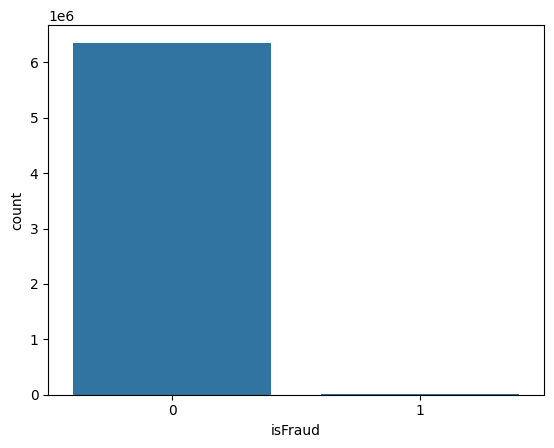

In [ ]:
sns.countplot(x = fraud["isFraud"])

Need to applyapplying Smote_sampling.because the dependent variable is too biased.

# checking for outliers

Text(0.5, 1.0, 'amount')

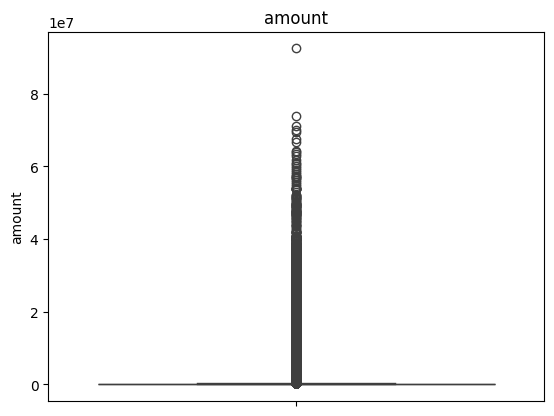

In [ ]:
sns.boxplot(fraud["amount"])
plt.title("amount")


In [ ]:
# Here I am using IQR to remove outliers.
# IQR for Amount column

Q1 = fraud["amount"].quantile(0.25)
Q3 = fraud["amount"].quantile(0.75)
print(Q3,Q1)
IQR = Q3-Q1
print(IQR)
upperbound = Q3 +1.5 * IQR
print(upperbound)
#only caping upperbound because only upperbound have outliers.

208721.4775 13389.57
195331.9075
501719.33875


In [ ]:
fraud["amount"] = np.where(fraud["amount"]>upperbound,upperbound,fraud["amount"])

<Axes: ylabel='amount'>

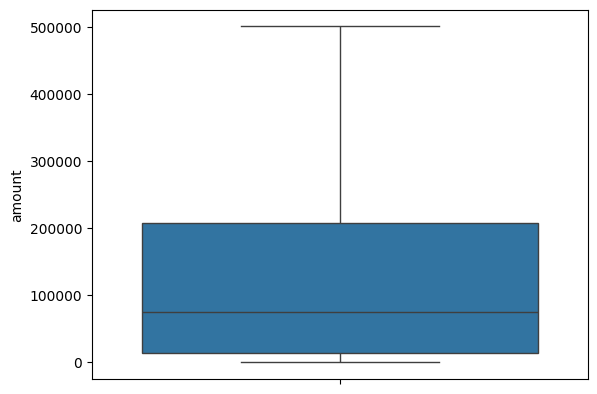

In [ ]:
sns.boxplot(fraud["amount"])

checking outliers for Step

<Axes: ylabel='step'>

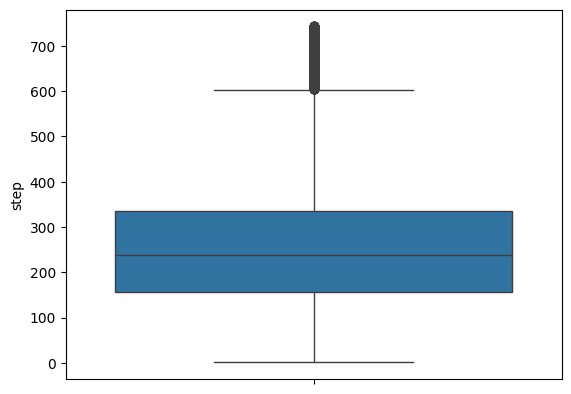

In [ ]:
sns.boxplot(fraud["step"])

step also having outliers.need to cap them.

In [ ]:
Q1 = fraud["step"].quantile(0.25)
Q3 = fraud["step"].quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)
upperbound = Q3 +1.5 * IQR



156.0 335.0
179.0


In [ ]:
fraud["step"] = np.where(fraud["step"]>upperbound,upperbound,fraud["step"])

<Axes: ylabel='step'>

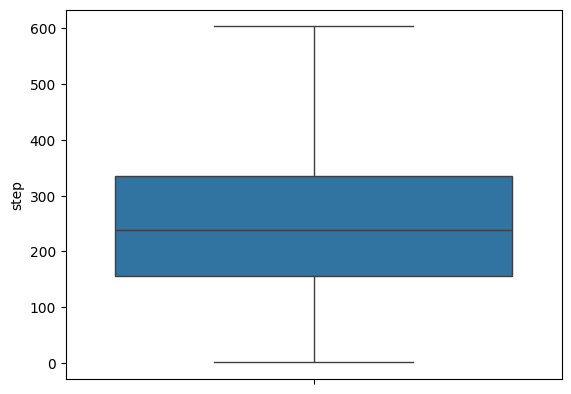

In [ ]:
sns.boxplot(fraud["step"])

checking outliers for oldbalanceorg.

<Axes: ylabel='oldbalanceOrg'>

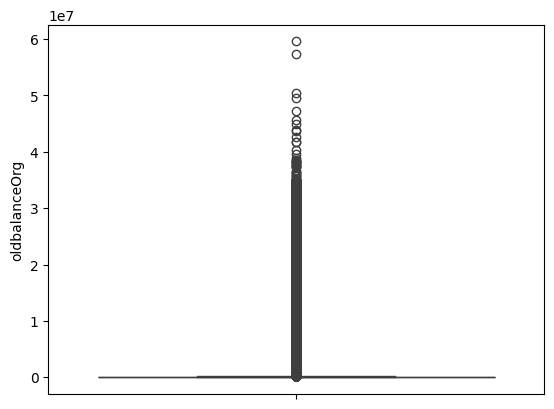

In [ ]:
sns.boxplot(fraud["oldbalanceOrg"])

oldbalanceorg having outliers. need to cap them.

In [ ]:
Q1 = fraud["oldbalanceOrg"].quantile(0.25)
Q3 = fraud["oldbalanceOrg"].quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)
upperbound = Q3 +1.5 * IQR


0.0 107315.175
107315.175


In [ ]:
fraud["oldbalanceOrg"]= np.where(fraud["oldbalanceOrg"]>upperbound,upperbound,fraud["oldbalanceOrg"])

<Axes: ylabel='oldbalanceOrg'>

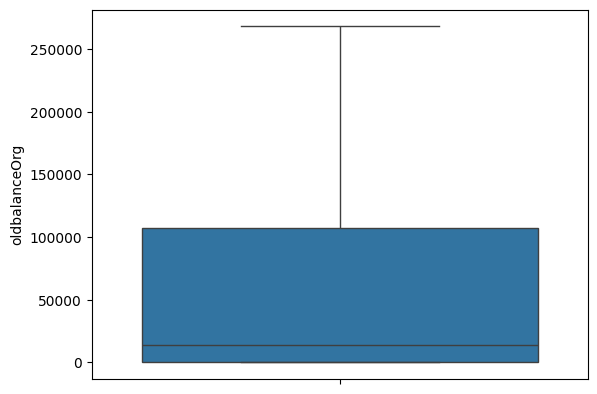

In [ ]:
sns.boxplot(fraud["oldbalanceOrg"])

checking outliers for newbalanceorg

<Axes: ylabel='newbalanceOrig'>

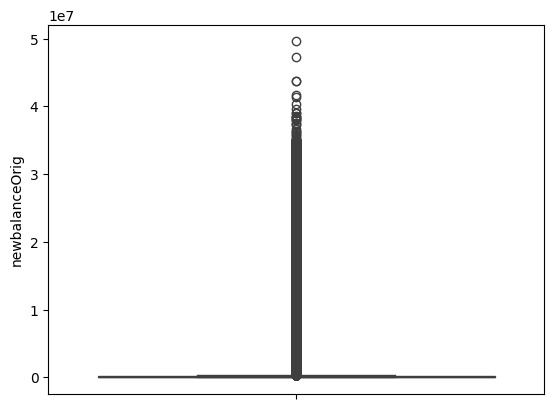

In [ ]:
sns.boxplot(fraud["newbalanceOrig"])

newbalanceorig have outliers, need to cap them.

In [ ]:
Q1 = fraud["newbalanceOrig"].quantile(0.25)
Q3 = fraud["newbalanceOrig"].quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)
upperbound = Q3 +1.5 * IQR


0.0 144258.41
144258.41


In [ ]:
fraud["newbalanceOrig"]= np.where(fraud["newbalanceOrig"]>upperbound,upperbound,fraud["newbalanceOrig"])

<Axes: ylabel='newbalanceOrig'>

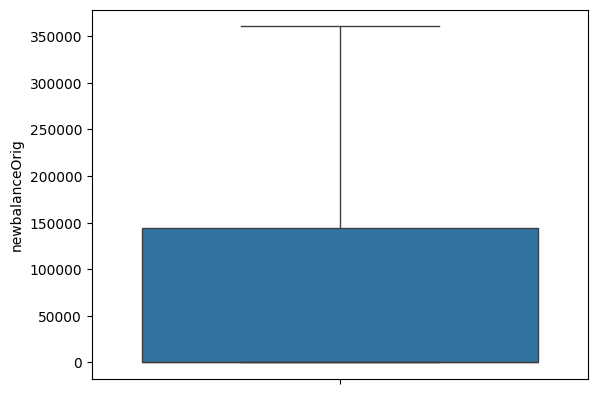

In [ ]:
sns.boxplot(fraud["newbalanceOrig"])

checking outliers for oldbalanceDest

<Axes: ylabel='oldbalanceDest'>

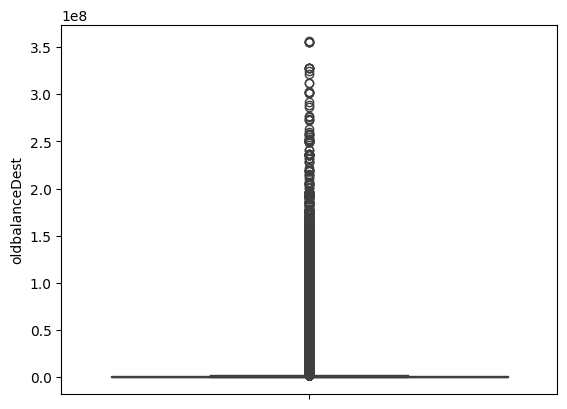

In [ ]:
sns.boxplot(fraud["oldbalanceDest"])

oldbalancedest have outliers, need to cap them

In [ ]:
Q1 = fraud["oldbalanceDest"].quantile(0.25)
Q3 = fraud["oldbalanceDest"].quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)
upperbound = Q3 +1.5 * IQR


0.0 943036.7075
943036.7075


In [ ]:
fraud["oldbalanceDest"]= np.where(fraud["oldbalanceDest"]>upperbound,upperbound,fraud["oldbalanceDest"])

<Axes: ylabel='oldbalanceDest'>

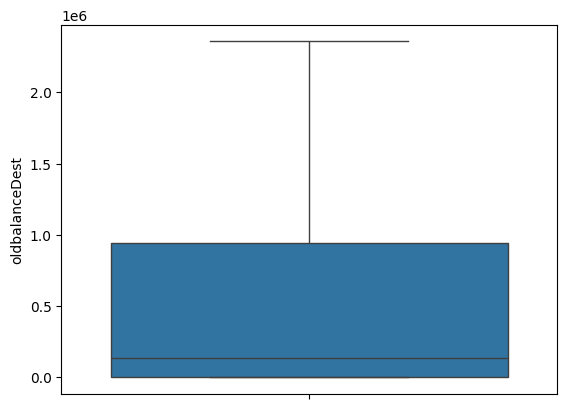

In [ ]:
sns.boxplot(fraud["oldbalanceDest"])

checking outliers for newbalanceDest

<Axes: ylabel='newbalanceDest'>

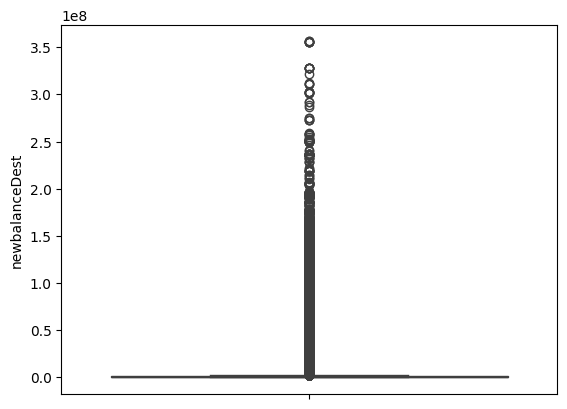

In [ ]:
sns.boxplot(fraud["newbalanceDest"])

newbalancedest have outliers need to cap them.

In [ ]:
Q1 = fraud["newbalanceDest"].quantile(0.25)
Q3 = fraud["newbalanceDest"].quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)
upperbound = Q3 +1.5 * IQR


0.0 1111909.25
1111909.25


In [ ]:
fraud["newbalanceDest"]= np.where(fraud["newbalanceDest"]>upperbound,upperbound,fraud["newbalanceDest"])

<Axes: ylabel='newbalanceDest'>

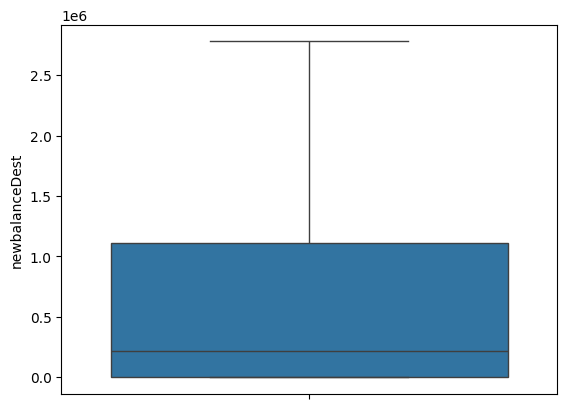

In [ ]:
sns.boxplot(fraud["newbalanceDest"])

# checking correlation

There is string columns like type,etc,, Correlation needs only numerical data

In [ ]:
objtypele = fraud.select_dtypes(include = object).columns
print(objtypele)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [ ]:
for col in ['type', 'nameOrig', 'nameDest']:
  fraud[col] = Le.fit_transform(fraud[col])

In [ ]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1.0,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1.0,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1.0,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1.0,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [ ]:
fraud.info() # agian checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            float64
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(6), int64(5)
memory usage: 534.0 MB


# Checking Null Values

In [ ]:
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

no null values in data set.

# VIF method for feature selection

In [ ]:
#checking multicollinearity by using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#vif dataframe
vif_df = pd.DataFrame()
vif_df["features"] = fraud.columns

#calculating VIF
vif_df["VIF"] = [variance_inflation_factor(fraud.values,i) for i in range (len(fraud.columns))]
print(vif_df)




          features        VIF
0             step   3.133997
1             type   5.345136
2           amount   3.019910
3         nameOrig   3.119719
4    oldbalanceOrg   6.290544
5   newbalanceOrig   7.314333
6         nameDest   4.200558
7   oldbalanceDest  34.213736
8   newbalanceDest  38.185437
9          isFraud   1.025277
10  isFlaggedFraud   1.002020


 I am dropping the columns based on the results I have gotten from VIF. anything above 5 is excluded from the dataset


In [ ]:
fraud['Actual_amount_orig'] = fraud.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
fraud['Actual_amount_dest'] = fraud.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
fraud['TransactionPath'] = fraud.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)
fraud= fraud.drop(["type","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"],axis = 1)


'''vif_df["VIF"] = [variance_inflation_factor(fraud.values,i) for i in range (len(fraud.columns))]
print(vif_df)'''


'vif_df["VIF"] = [variance_inflation_factor(fraud.values,i) for i in range (len(fraud.columns))]\nprint(vif_df)'

In [ ]:
vif_df = pd.DataFrame()
vif_df["features"] = fraud.columns

#calculating VIF
vif_df["VIF"] = [variance_inflation_factor(fraud.values,i) for i in range (len(fraud.columns))]
print(vif_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


             features       VIF
0                step  2.895302
1              amount  2.676751
2            nameOrig       inf
3            nameDest       inf
4             isFraud  1.019445
5      isFlaggedFraud  1.001992
6  Actual_amount_orig  1.311379
7  Actual_amount_dest  1.961843
8     TransactionPath       inf


<Axes: >

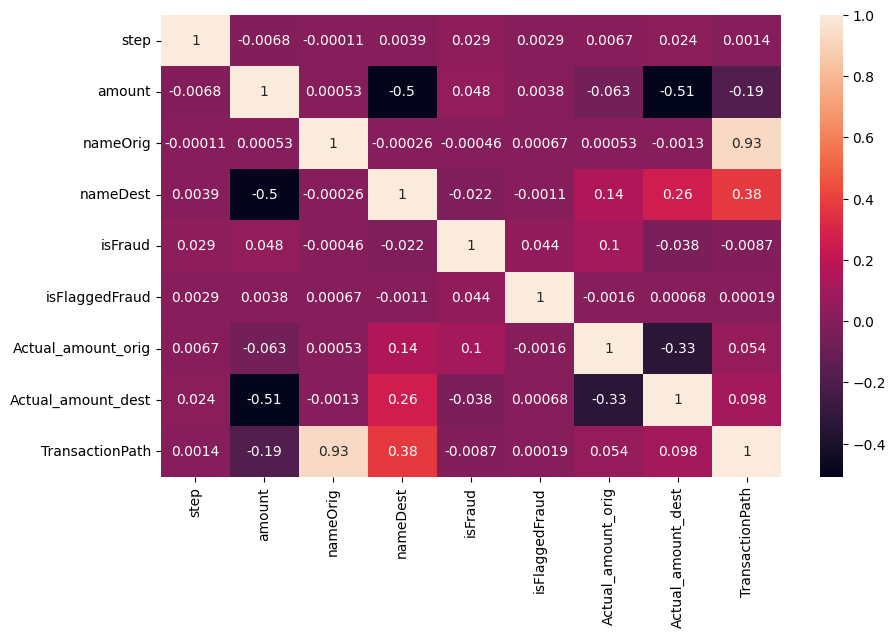

In [ ]:
corr=fraud.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [ ]:
fraud = fraud.drop(["TransactionPath"],axis = 1)

In [ ]:
x = fraud.drop(["isFraud"],axis = 1)
y = fraud['isFraud']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(4453834, 7)
(4453834,)
(1908786, 7)
(1908786,)


In [ ]:
x.columns

Index(['step', 'amount', 'nameOrig', 'nameDest', 'isFlaggedFraud',
       'Actual_amount_orig', 'Actual_amount_dest'],
      dtype='object')

# Feature Scaling

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)
print(x_test)

[[-2.89245601e-01 -7.21442187e-01 -3.75957898e-01 ... -1.42152558e-03
  -1.39911533e-01 -1.14942644e+00]
 [-1.48268444e+00  1.45392985e+00 -6.91365624e-01 ... -1.42152558e-03
   2.24523680e-01 -1.14942644e+00]
 [-1.59771469e+00  2.52647449e+00  6.67584058e-01 ... -1.42152558e-03
   2.24523680e-01 -1.14942644e+00]
 ...
 [ 7.74784211e-01 -8.32176417e-01 -6.94366298e-01 ... -1.42152558e-03
   3.68533141e-01  3.89260385e-01]
 [ 4.65640414e-01 -4.05170960e-01  6.18680655e-01 ... -1.42152558e-03
   5.00708931e-01  1.55835773e-01]
 [-5.98389398e-01 -2.91118222e-01  1.66772503e+00 ... -1.42152558e-03
   1.44555475e+00  9.34883359e-02]]
[[ 2.57148086e-01  1.35366937e+00  1.07263793e+00 ... -1.42152558e-03
  -4.27059473e+00  1.66325929e+00]
 [-1.63366165e+00 -8.24873470e-01 -1.25899407e+00 ... -1.42152558e-03
   3.83070267e-01  4.28808313e-01]
 [-1.66960860e+00  1.36733564e-01 -3.94799490e-01 ... -1.42152558e-03
  -1.84818218e+00  9.98015515e-01]
 ...
 [ 9.68897757e-01 -8.96323931e-01  1.5490912

In [ ]:
x_train.shape

(4453834, 7)

In [ ]:
x_test.shape

(1908786, 7)

# SMOTE- for Imbalanced dataset

In [ ]:
!pip install imblearn
#from imblearn.over_sampling import SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)


In [ ]:
y_smote.value_counts()

isFraud
0    6354407
1    6354407
Name: count, dtype: int64

# Model building

# Decission Tree

In [ ]:
dec_tr = DecisionTreeClassifier()
dec_tr.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dec_tr.predict(x_test)

In [ ]:
dec_tr_score = dec_tr.score(x_train,y_train)*100

In [ ]:
print(dec_tr_score)

100.0


In [ ]:
accuracy_score(y_pred_dt,y_test)

0.9991277178269329

# Random Forest

In [ ]:
#setting hyperperameters
n_estimators = 100
#max_depth = None(Adjust as needed)
#min_samples_split = 2
ran_for = RandomForestClassifier(n_estimators= n_estimators)


In [ ]:
ran_for.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
batch_size = 10000  # Adjust as needed
num_batches = len(x_train) // batch_size

for i in range(num_batches):
    start = i * batch_size
    end = (i + 1) * batch_size
    x_batch = x_train[start:end]
    y_batch = y_train[start:end]
    ran_for.fit(x_batch, y_batch)

In [ ]:
y_pred_rf = ran_for.predict(x_test)

In [ ]:
ran_for_score = ran_for.score(x_train,y_train)*100

In [ ]:
print(ran_for_score)

99.87974405871437


chacking the results that how accurate the results are

In [ ]:
accuracy_score(y_pred_rf,y_test)

0.9988149535883016

In [ ]:
print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')



TP,FP,TN,FN - Decision Tree
True Positives: 1622
False Positives: 852
True Negatives: 1905499
False Negatives: 813
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 193
False Positives: 20
True Negatives: 1906331
False Negatives: 2242


In [ ]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)



Confusion Matrix - Decision Tree
[[1905499     852]
 [    813    1622]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[1906331      20]
 [   2242     193]]


# Classification report

In [ ]:
classification_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")


# classification report - RF

classification_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.66      0.67      0.66      2435

    accuracy                           1.00   1908786
   macro avg       0.83      0.83      0.83   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.91      0.08      0.15      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.54      0.57   1908786
weighted avg       1.00      1.00      1.00   1908786



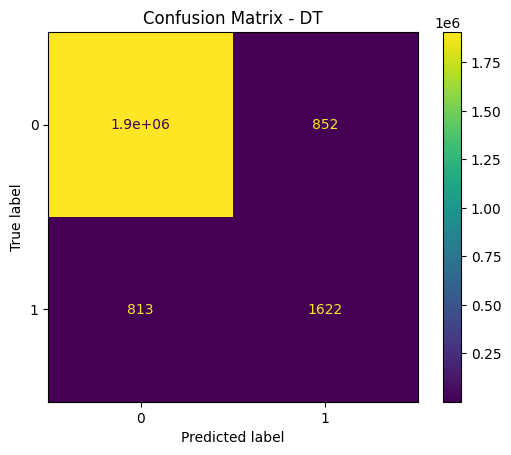

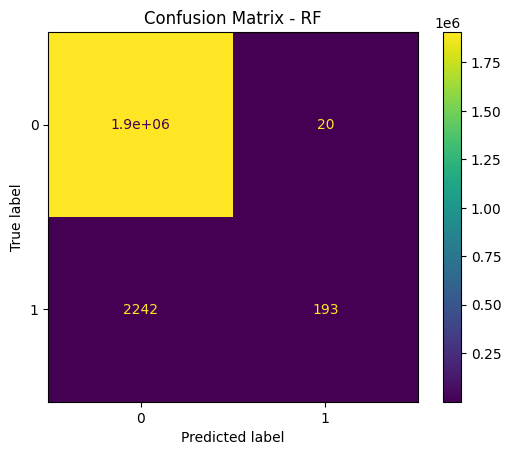

In [ ]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()


We have seen that Accuracy of Random Forest and Decision Tree is equal,although the precision of Random Forest is more.but accuracy level is decission tree is the best. In a fraud detection model,predicting normal transactions correctly and also we want Fraud transactions to be predicted correctly and innocents to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.
This is also one of the reason why Random Forest and Decision Tree are used instead of other algorithms.

Also the reason I have chosen this model is because of highly unbalanced dataset (notfraud: Fraud :: 99.87:0.13).so decission tree and Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way without mistake by more number of decision tree.


Models like XGBoost, Bagging and Logistic Regression may give good accuracy but they won't give good precision and recall values.

What are the key factors that predict fraudulent customer?

Time,amount, name of the organization, name of the destination are importent to find out fraudlent customers.
1.Accounts link with mobiles,if any transaction is happening asap get notification for proceed the transaction or not.
2.The source of request is correct or not ?
2.Is the name of organisation asking for money is notfruad or not ?
3.Transaction history of vendors.
4.maintaing transfors with OTP's.

What kind of prevention should be adopted while company update its infrastructure?

maintain online bankings securely.
make rules easily understandable to each customer(for also illeteracy people)
give awarness about fraudtransactions to people.
linked mobiles to accounts.
new rules for sharing automatic generated otp's for every transactions.
Use smart vertified apps only.
Browse through secured websites.
Use secured internet connections (USE VPN).
Keep your mobile and laptop security updated.
Don't respond to unsolicited calls/SMS(s/E-mails).
If you feel like you have been tricked or security compromised, contact your bank immidiately.

Assuming these actions have been implemented, how would you determine if they work?

Bank sending E-statements.
Customers keeping a check of their account activity.
Always keep a log of your payments.

What are the key factors that predict fraudulent customer?

1.The source of request is secured or not ?

2.Is the name of organisation asking for money is fraud or not ?

3.Transaction history of vendors.

What kind of prevention should be adopted while company update its infrastructure?

1.Use smart vertified apps only.

2.Browse through secured websites.

3.Use secured internet connections (USE VPN).

4.Keep your mobile and laptop security updated.

5.Don't respond to unsolicited calls/SMS(s/E-mails.

6.If you feel like you have been tricked or security compromised, contact your bank immidiately.

Assuming these actions have been implemented, how would you determine if they work?

1.Bank sending E-statements.

2.Customers keeping a check of their account activity.

3.Always keep a log of your payments.